<a href="https://colab.research.google.com/github/AnthonyCampos123/SURP-Neural-Network-Model-Distillation-and-Pruning-for-Pattern-Recognition-and-Predictions/blob/main/PyTorch_Neural_Network_4_SURP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0 and loss: 4325.548828125
Epoch: 10 and loss: 2792.0302734375
Epoch: 20 and loss: 644.7916870117188
Epoch: 30 and loss: 0.8462762236595154
Epoch: 40 and loss: 0.4521883428096771
Epoch: 50 and loss: 0.5383399724960327
Epoch: 60 and loss: 0.5899929404258728
Epoch: 70 and loss: 0.5929709672927856
Epoch: 80 and loss: 0.5740607976913452
Epoch: 90 and loss: 0.5492539405822754
Epoch: 100 and loss: 0.525533139705658
Epoch: 110 and loss: 0.5054097175598145
Epoch: 120 and loss: 0.48942244052886963
Epoch: 130 and loss: 0.4772869050502777
Epoch: 140 and loss: 0.46841058135032654
Epoch: 150 and loss: 0.4621306359767914
Epoch: 160 and loss: 0.45782414078712463
Epoch: 170 and loss: 0.4549596309661865
Epoch: 180 and loss: 0.4531095027923584
Epoch: 190 and loss: 0.45194926857948303
Epoch: 200 and loss: 0.4512425363063812
Epoch: 210 and loss: 0.4508240818977356
Epoch: 220 and loss: 0.45058342814445496
Epoch: 230 and loss: 0.4504489600658417
Epoch: 240 and loss: 0.45037585496902466
Epoch: 250 and

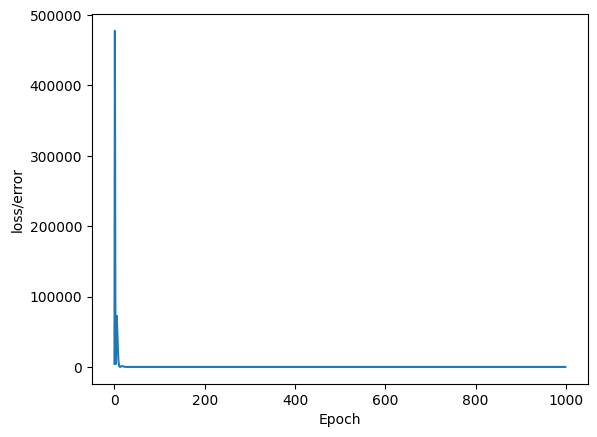

Test Loss: 0.586240828037262
Predicted Gas Price for Year 2024 and Inflation Rate 2.326: 2.895037889480591
Predicted Gas Price for Year 2025 and Inflation Rate 1.721: 2.896554470062256


Model(
  (fc1): Linear(in_features=2, out_features=101, bias=True)
  (fc2): Linear(in_features=101, out_features=121, bias=True)
  (out): Linear(in_features=121, out_features=1, bias=True)
)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# creating a model class that inherits nn.module
class Model(nn.Module):
    # input layer - 2 features (year, inflation rate) ->
    # hidden layer1 (some number of neurons) ->
    # H2 (n) -> output (inflation rate as a numeric value)
    def __init__(self, in_features=2, h1=101, h2=121, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)  # input -> h1
        self.fc2 = nn.Linear(h1, h2) # h1 -> h2
        self.out = nn.Linear(h2, out_features) # h2 -> output

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

# manual seed for randomization
torch.manual_seed(47)

# create an instance of the model
model = Model()

# to load in data
import pandas as pd
# to create chart
import matplotlib.pyplot as plt
%matplotlib inline

# loading in data / year, inflation rate %, gas price avg
url = 'https://raw.githubusercontent.com/AnthonyCampos123/Gas-Price-v.-Inflation-Categorization-Training-Dataset/main/Predict%20Gas%20Price%20Given%20Year%20and%20Inflation%20Rate%20-%20Sheet1.csv'
my_df = pd.read_csv(url)

# prepare the data
X = my_df[['Year', 'Inflation Rate (%)']].values
y = my_df['Gas Price Avg'].values

# train test split: set X=input, y=output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).view(-1, 1)  # reshape y to be a 2D tensor for regression (2 inputs)
y_test = torch.FloatTensor(y_test).view(-1, 1)

# set the crierion of model to meansure the error (how far predictions
# are from the model)
criterion = nn.MSELoss()  # MSELoss = Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# train the model
# epochs (one iteration through all the training data in network)
epochs = 1000
losses = []
for i in range(epochs):
    # go forward and get a prediction
    y_pred = model(X_train)

    # measure the loss/error
    loss = criterion(y_pred, y_train)

    # Backward pass / backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # keep track of losses, will help determine accuracy
    losses.append(loss.item())

    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss.item()}')

# plor loss
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.show()

# evaluate model on test data set (validate model on test set)
with torch.no_grad():
    y_eval = model(X_test)
    loss = criterion(y_eval, y_test)
    print(f'Test Loss: {loss.item()}')

# predict new values, 2 inputs
test_data_1 = torch.tensor([[2024, 2.326]])
test_data_2 = torch.tensor([[2025, 1.721]])

with torch.no_grad():
    pred1 = model(test_data_1).item()
    pred2 = model(test_data_2).item()
    print(f'Predicted Gas Price for Year 2024 and Inflation Rate 2.326: {pred1}')
    print(f'Predicted Gas Price for Year 2025 and Inflation Rate 1.721: {pred2}')

# save neural network model
torch.save(model.state_dict(), 'neural_network_4.pt')

# load the model
new_model = Model()
new_model.load_state_dict(torch.load('neural_network_4.pt'))

# ensure model is loaded correctly
new_model.eval()
